In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_prepr_data = "/content/drive/MyDrive/sharing/datasets/avito/preprocessed_data"
prepr_queries_data = pd.read_csv(path_to_prepr_data + "/prepr_queries.csv", header = None)
prepr_descriptions_data = pd.read_csv(path_to_prepr_data + "/prepr_descriptions.csv", header = None,\
                                      sep ='<<', engine = 'python')

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop = list(stopwords.words('russian'))
print(set(stop))
def parse_file(data):
  docs = []
  for s in data.values.flatten():
      s = s.split(' ')
      s = [c for c in s if c not in stop]
      docs.append([s[0], ' '.join(s[1:])])
  return pd.DataFrame(docs) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'нас', 'зачем', 'нет', 'она', 'куда', 'им', 'свою', 'разве', 'без', 'меня', 'мой', 'бы', 'чтоб', 'наконец', 'во', 'еще', 'том', 'будет', 'него', 'этом', 'ему', 'все', 'потом', 'совсем', 'вас', 'были', 'более', 'теперь', 'ни', 'мне', 'кто', 'быть', 'вы', 'один', 'под', 'его', 'можно', 'такой', 'будто', 'ним', 'чуть', 'всегда', 'от', 'какая', 'здесь', 'три', 'не', 'всех', 'впрочем', 'об', 'надо', 'ней', 'лучше', 'так', 'про', 'того', 'я', 'через', 'из', 'тебя', 'там', 'их', 'ли', 'конечно', 'со', 'в', 'они', 'между', 'есть', 'что', 'моя', 'нибудь', 'после', 'иногда', 'этой', 'чего', 'может', 'никогда', 'у', 'но', 'тем', 'на', 'себя', 'ты', 'потому', 'и', 'себе', 'уж', 'была', 'за', 'перед', 'тогда', 'уже', 'сейчас', 'ее', 'о', 'чем', 'почти', 'если', 'другой', 'эти', 'тоже', 'всю', 'нее', 'тот', 'них', 'был', 'да', 'по', 'больше', 'было', 'даже', 'как', 'мы', 'то', 'вдруг', 'чт

In [ ]:
#prep_desc_ind = parse_file(prepr_descriptions_data)
#prep_desc_ind.to_csv(path_to_prepr_data + "/prep_desc_ind.csv", header = None, index = None)
prep_desc_ind = pd.read_csv(path_to_prepr_data + "/prep_desc_ind.csv", header = None)
prep_desc_ind = prep_desc_ind.fillna('nan')

In [ ]:
prep_desc_ind.tail(20)

,0,1
489497,489497,телефон отличный состояние купить октябрь xxxx...
489498,489498,продавать монитор lg fxxxp диагональ xx компле...
489499,489499,цена уточнять артикул являться поставщик отпра...
489500,489500,коляска прогулочный вездеход jetem prism цвет ...
489501,489501,продавать монитор разрешение xк жк-монитор диа...
489502,489502,lg lxx разбить стекло зад крышка .samsung gala...
489503,489503,продавать серия монета красный книга xxxx год ...
489504,489504,"отличный состояние покупать xx,xxxрубль xx мел..."
489505,489505,кожаный диван цвет черный состояние смотреть фото
489506,489506,эффект задержка состояние отличный педаль липу...


In [ ]:
# prep_quer_ind = pd.DataFrame(prepr_queries_data) 
# prep_quer_ind.to_csv(path_to_prepr_data +  "/prep_quer_ind.csv", header = None, index = None)
prep_quer_ind = pd.read_csv(path_to_prepr_data +  "/prep_quer_ind.csv", header = None)
prep_quer_ind.head(20)
prep_quer_ind = prep_quer_ind.fillna('nan')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
prepr_queries = prep_quer_ind[[1]].values.flatten().tolist()
prepr_descriptions = prep_desc_ind[[1]].values.flatten().tolist()
prepr_queries[:3]

['картина', 'стул прессовать кожа', 'домашний миня баня']

In [ ]:
import _pickle as pickle
from scipy import sparse
import sklearn
#!pip install scikit-learn==0.24.1
#tfidf = TfidfVectorizer()
#matrix = tfidf.fit_transform(prepr_descriptions, prepr_queries)
print(sklearn.__version__)
#pickle.dump(tfidf, open("/content/drive/MyDrive/sharing/models/tfidf.pickle", "wb+"))
tfidf = pickle.load(open("/content/drive/MyDrive/sharing/models/tfidf.pickle", "rb"))


#sparse.save_npz("/content/drive/MyDrive/sharing/models/tfidf_matrix.npz", matrix)
#matrix = sparse.load_npz("/content/drive/MyDrive/sharing/models/tfidf_matrix.npz")


0.24.1


In [ ]:

def getSimilarities(query, documents, matrix, tfidf): 
  """
  Find cosine distancies between query and list of documents.
  Query must be in a list too.
  Returns cosine distancies sorted descending.
  """
  new_entry = tfidf.transform([query])
  return np.sort(linear_kernel(new_entry, matrix).flatten())[::-1]

def printSimilarities(query, documents, count = 30):
  """
  Find cosine distancies between query and list of documents.
  Query must be in a list too.
  Prints pairs(document, cosine distance) sorted descending.
  """
  new_entry = tfidf.transform(query)
  df = pd.DataFrame({'texts':documents})
  # запишем все попарные результаты сравнений
  #matrix = tfidf.transform(documents) #если ограничивать количество документов категорией или хранить уже готовые векторы для документов в базе, будет быстрее, чем каждый раз считать эту матрицу
  #если брать базу целиком, то можно хранить предпосчитанную матрицу, как я делаю здесь

  df['cos_similarities'] = linear_kernel(new_entry, matrix).flatten()
  # и отсортируем по убыванию (т.к. cos(0)=1)
  df = df.sort_values(by=['cos_similarities'], ascending = False)
  # Выведем самые близкие результаты
  for index, row in df[0:count].iterrows():
    print(index, row['texts'], row['cos_similarities'])
  # output:

def cosine_sim(text1, text2):
  """
  Find cosine distance between two documents in str format.
  """
  if(np.nan in [text1, text2]): return 0.
  tfidf_val = tfidf.transform([text1, text2])
  return ((tfidf_val * tfidf_val.T).A)[0,1]

def cosine_sim_multy(query, inds, documents):
  """
  Find cosine distance between list of documents in str format.
  """
  distancies = []
  for i in inds:
    dist = cosine_sim(query, documents[i])
    if(dist > 0):
      distancies.append([i, dist])
  return sorted(distancies, key = itemgetter(1),  reverse=True)


In [ ]:
import random
from operator import itemgetter
id = random.randint(0, len(prepr_queries))
print("query =", prepr_queries[id], "-->", prepr_descriptions[id])
printSimilarities([prepr_queries[id]], prepr_descriptions, count=10)

print( cosine_sim(prepr_queries[id], prepr_descriptions[id]))
print( cosine_sim_multy(prepr_queries[id], np.arange(0, len(prepr_descriptions),1000), prepr_descriptions))

query = гитара ibanez gaxxx --> продавать гитара ibanez gaxxx отличный состоянии,во комплект идти комбоусилитель belcat также зимний чехол,товар отдельно продавать комплект возможный торг
308663 продавать гитара ibanez gaxxx отличный состоянии,во комплект идти комбоусилитель belcat также зимний чехол,товар отдельно продавать комплект возможный торг 0.5464115406514284
448630 рабочий новый иметься чехол гитара гитара ibanez gio gaxxx transparent red комбик leem xxwatt шнур полный комплект очень срочно 0.5200610976610868
454614 срочно продавать гитара отличный состояние ibanez gaxxx договариваться продавать комплект шнур jack-jack мя -чехол ремень x комплект струна elixir xxxxx super light nanoвеб x,xxx d'addario ehrxxx x,xxx -x,xxx гитара интересовать звонить спрашивать 0.41896916396141237
207767 продавать гитара ibanez gio хороший состояние 0.41739962970524136
365017 продавать гитара ibanez gio nxxx чехол комбик ibanez gtaxx шнур proel ibanez тюнер automatiс 0.3932926456374233
358261 ги

In [ ]:
print(cosine_sim('мебель', 'купить мебель мухосранск недорого'))
print(cosine_sim('мебель', 'купить самокат мухосранск недорого'))
print(cosine_sim('лобзание единорог xbox', 'xbox единорог'))
print(cosine_sim('лобзание единорог xbox', 'xbox игр'))
print(cosine_sim('отдам костюм для ролевых игр', 'xbox игры'))
print(cosine_sim('отдам костюм ведьмак ролевые игр', 'костюм ведьмак москва'))
 # c обработанными данными лучше, очевидно

0.5333802109909493
0.0
1.0000000000000002
0.29970425723846195
0.0
0.5687212845935933


In [ ]:
import time
from sklearn.metrics  import accuracy_score #, f1_score, confusion_matrix, classification_report
start = time.time()
# Function to report the quality of the model
def performance_report(value, score_list):
    # the value (0-1) is the cosine similarity score to determine if a pair of questions
    # have the same meaning or not.
    scores = []
    for score in score_list:
        if score >= value:
            scores.append(1)
        else:
            scores.append(0)
    y = np.ones(len(scores))
    accuracy = accuracy_score(y, scores) * 100
    print("Accuracy score is {}%.".format(round(accuracy),1))
    # print()
    # print("Confusion Matrix:")
    # print(confusion_matrix(y, scores))
    # print()


In [ ]:
# test_queries_data = pd.read_csv(path_to_prepr_data + "/test_queries.csv", header = None,  sep ='\t', engine = 'python')
# test_descriptions_data = pd.read_csv(path_to_prepr_data + "/test_descriptions.csv", header = None,\
#                                       sep ='\t', engine = 'python')

# test_desc_ind = parse_file(test_descriptions_data)
# test_desc_ind.to_csv("/content/drive/MyDrive/sharing/datasets/avito/preprocessed_data/test_desc_ind.csv", header = None, index = None)

# test_quer_ind = parse_file(test_queries_data) 
# test_quer_ind.to_csv("/content/drive/MyDrive/sharing/datasets/avito/preprocessed_data/test_quer_ind.csv", header = None, index = None)

test_quer_ind = pd.read_csv(path_to_prepr_data +  "/test_quer_ind.csv", header = None, index_col = 0) #полагается такой формат с бека после обработки текста нашим скриптом
#наверное надо иметь копию текста в обработанном виде в базе, не делать же это на каждый запрос
#у меня были проблемы с разделением большого количества обработанных документов по индексам, поэтому так. По-хорошему, нужно откомментить обработку чисел в скрипте(тут я это делал отдельно) и список файлов документов переводить в список файлов.
#Если обрабатывать документы не скопом, а по очереди, то этой проблемы быть не должно.
print(test_quer_ind.index)
test_desc_ind = pd.read_csv(path_to_prepr_data +  "/test_desc_ind.csv", header = None)
print(test_desc_ind.tail(20))
print("----------")
print(test_quer_ind.tail(20))
test_quer_ind = test_quer_ind.fillna("nan")
test_desc_ind = test_desc_ind.fillna("nan")

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            243156, 243157, 243158, 243159, 243160, 243161, 243162, 243163,
            243164, 243165],
           dtype='int64', name=0, length=243166)
             0                                                  1
243146  243146  кофе машина пользоваться пара покупать полгода...
243147  243147  штора абсолютно новый вуаль,цвать светлый фиол...
243148  243148  предлагать керамогранить kerranova forest xxx ...
243149  243149  устанавливать лс linux mint легкий подойти леж...
243150  243150  продавать связь ненадобнасть хороший акустика ...
243151  243151  первый любительский кинокамера сссругой xхxмил...
243152  243152  продавать серьга xxx комбинированный артикул x...
243153  243153  характеристика количество порт usb x коннектор...
243154  243154  товар новый замок x -xxxxxx вести xхxxxxмиллим...
243155  243155  шикарный часы оптовый цена час это стиль hublo...


In [ ]:
test_queries = test_quer_ind[[1]].values.flatten().tolist()
test_descriptions = test_desc_ind[[1]].values.flatten().tolist()

print(test_queries[:5])
print(test_descriptions[:5])

['стоик журнальный сталь', 'iphone x xxgb', 'утеплитель', 'пальто демисезонный', 'samsung syncmaster txxxn']
['продать журнальный столик изготавливать стол полировать нержавеющий сталь стекло камень весь продукция давать гарантия стоимость зависеть размер дизайн', 'телефон хороший состояние комплект гарантия салон сотовый связь огромный выбор аксессуар запчасть новый б/у сотовый телефон возможный обмен ремонт сотовый телефон график работа x.xx xx.xx', 'теплопелен-лидер теплый толщина утеплитель xx мм xx мм xx мм xx мм xx мм xx мм xx мм xx мм xxx мм xxx ммя утеплитель безопасный человек окружать среда состав утеплитель основа полиэтилен отражать слой чистый алюминиевый фольга металлизировать лавсановый полипропиленовый пленка весь компонента широко использовать быт пищевой промышленность медицине обладать очень низкий стабильный коэффициент теплопроводность высокий процент теплоотражение эффективно сохранять тепло зима прохлада летомя также утеплитель пропускать пар впитывать влага обла

In [ ]:
m = tfidf.transform(test_queries, test_descriptions)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1897: FutureWarning: 'copy' param is unused and has been deprecated since version 0.22. Backward compatibility for 'copy' will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


In [ ]:

# dump  = open(path_to_prepr_data+"/dump.csv", "w")
# start = time.time()
# #-------------------------
# test_indetical_scores = []
# test_scores = []
# batch = len(test_queries[:10000])
# for i in range(batch):
#     dump.write('QUERY: ' + test_queries[i] + " ORIGINAL DESC: " + test_descriptions[i])
#     dump.write("\n\n----------MOST RELEVANT----------\n\n")
#     #
#     df = pd.DataFrame({'texts':test_descriptions})
#     df['cos_similarities'] = linear_kernel(tfidf.transform([test_queries[i]]), m).flatten()
#     df = df.sort_values(by=['cos_similarities'], ascending = False)
#     for index, row in df[0:20].iterrows():
#         dump.write(str(index)+' '+ row['texts']+ ' ' + str(row['cos_similarities'])+"\n")
#     dump.write("\n**********************\n")
#     test_scores.append(df['cos_similarities'].values[0])
#     if i % 10 == 0:
#         progress = i/batch * 100
#         print("Similarity Scores is {}% complete.".format(round(progress,2)))

# dump.close()
    

# #-------------------------
# end = time.time()

# print("total time = ", end - start)

performance_report(0.3, test_scores) 
print(np.mean(test_scores))

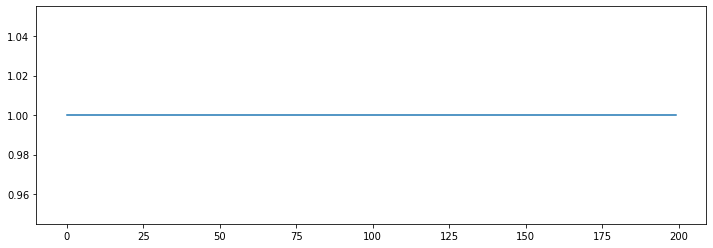

[1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000002, 0.9999999999999999, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0, 1.0000000000000004, 1.0, 1.0, 1.0, 1.0000000000000002, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0000000000000002, 0.9999999999999998, 1.0, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000004, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 0.9999999999999998, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999998, 0.9999999999999999, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0,

In [ ]:
#На многие запросы находит документы с мерой близости 1.0 - 0.999. Думаю, что на самом деле это, в общем-то, хорошо.
#Во всяком случае, для протестированного количества запросов. Посмотреть результат на всех не хватит мощностей.
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))

plt.plot(np.arange(0,len(test_scores)), test_scores)
plt.show()
print(test_scores)

In [ ]:
#куски визуальных тестов

In [ ]:
c = tfidf.transform(test_descriptions)

In [ ]:
import random
df = pd.DataFrame({'texts':test_descriptions})
id = random.randint(0, len(test_queries))
print(linear_kernel(tfidf.transform([test_queries[id]]), c).flatten())
df['cos_similarities'] = linear_kernel(tfidf.transform([test_queries[id]]), c).flatten()
# и отсортируем по убыванию (т.к. cos(0)=1)
df = df.sort_values(by=['cos_similarities'], ascending = False)
  # Выведем самые близкие результаты
print(test_queries[id]+ "-->" + test_descriptions[id]+"\n")
for index, row in df[0:10].iterrows():
  print(index, row['texts'], row['cos_similarities'])

[0. 0. 0. ... 0. 0. 0.]
кровать металлический медицинский-->кровать б/у металлический медицинский самовывоз

164981 кровать б/у металлический медицинский самовывоз 0.9124457953495126
60311 продавать новый медицинский кровать комплект входить кровать матрац кровать полностью металлический подниматься верх бок подвижной перегородка 0.5874385870471956
144919 продавать кровать 0.48776229109048846
215799 кровать медицинский бортика регулировать положение тело новый упаковка 0.4489123026219462
119781 металлический б/у отличный состояние 0.4386106819247929
191972 кровать б хороший состояние 0.4355311050942778
15501 кровать хороший состояние 0.4355311050942778
134008 медицинский кровать туалетный устройство функция принятие положение сидеть мед.положений кардио кресло облегчать уход пациент различный регулировка упрощать процесc дизайн кровать подходить больница домашний интерьер особенность медицинский кровать b-xl механический регулировка также специальный медицинский положение секция удовле

In [ ]:
#можно хранить в базе векторы для документов, считать для них матрицу на ходу(подходит, если документов мало), хранить матрицу для всех документов(если нужно искать по всей базе)

In [ ]:
from scipy.sparse import coo_matrix, hstack
a = hstack((tfidf.transform([test_descriptions[0]] ), tfidf.transform([test_descriptions[1]] )))

linear_kernel(a,a)

array([[2.]])

In [ ]:
ind = test_quer_ind.index
quer =  test_quer_ind[[1]].values
a =  zip(ind, quer)
b = [pair[0] for pair in a]
b[:30]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]